In [55]:
from view import *
from datetime import *
from matplotlib.pyplot import *

In [126]:
EXAMPLE_JOURNAL = """
* write down reward modulated learning rule and include sketch figure                                                                                           * generate plot showing result of reward modulated learning for all layers                                                                                      * finish neurodynamics chapter 3 -> partially done, read just section 3.3                                                                                                                                                                                                                                                       done:                                                                                                                                                           * testing markdown desktop editor vnote                                                                                                                         * read neurodynamics section 3.3                                                                                                                                * improve Cell class to get cell id using cell_session_id and folder name (fname)s                                                                              * trying to understand why the position tracking from mat doesn't match the whl file. And the starting value for the plot isn't matching the one intended                                                                                                                                                                       ^Tprocrastination=0:30                                                                                                                                          ^Treading=5:20                                                                                                                                                  ^Tufrn=3:05                                                                                                                                                     ^Tpersonal=0:10                                                                                                                                                 ^Tmaiseducacao=0:15                                                                                                                                                                                                                                                                                                             
^A10:25^L11:45
^A14:50^E17:30
^S18:45^L22:15
^S23:50^E2:50
^S3:20^E4:00"""

In [127]:
def check_worktimes(text):  
#     arrivals = re.findall('\^A(\d?\d:\d\d)', text)
#     leavings = re.findall('\^L(\d?\d:\d\d)', text)
#     starts = re.findall('\^S(\d?\d:\d\d)', text)
#     ends = re.findall('\^E(\d?\d:\d\d)', text)
#     return arrivals, leavings, starts, ends 
    starts = re.findall('\^[SA](\d?\d:\d\d)', text)
    ends = re.findall('\^[EL](\d?\d:\d\d)', text)
    return starts, ends 

In [128]:
starts, ends = check_worktimes(EXAMPLE_JOURNAL)
starts, ends

(['10:25', '14:50', '18:45', '23:50', '3:20'],
 ['11:45', '17:30', '22:15', '2:50', '4:00'])

In [130]:
entries = []
for idx in range(len(starts)):
    start = str_to_timedelta(starts[idx])
    end = str_to_timedelta(ends[idx])
    duration = end-start
    start_str =  start.seconds/3600
    duration_str =  duration.seconds/3600
    entries.append((start_str, duration_str))
entries

[(10.416666666666666, 1.3333333333333333),
 (14.833333333333334, 2.6666666666666665),
 (18.75, 3.5),
 (23.833333333333332, 3.0),
 (3.3333333333333335, 0.6666666666666666)]

10.416666666666666 1.3333333333333333
14.833333333333334 2.6666666666666665
18.75 3.5
23.833333333333332 3.0
3.3333333333333335 0.6666666666666666


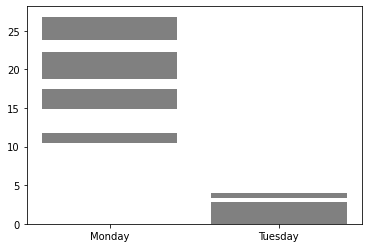

In [133]:
day = 1
for entry in entries:
    start, dur = entry
    print(start, dur)
#     if start >= 24: 
#         day = 2
    bar(day, dur, bottom=start, color='gray')
    if start <24 and start+dur>24:
        bar(day, 24-start, bottom=start, color='gray')
        day +=1
        bar(day, start+dur-24, bottom=0, color='gray')
        
plt.xticks([1,2],['Monday','Tuesday']);

### Change timedelta class
This could potentially be used to obviate the use of the str_to_timedelta and timedelta_to_str

In [156]:
class h_td (timedelta):
    def __init__(self, *args):
#         if type(args)=="str":
#             super().__init__(seconds=int(args.split(":")[0]) * 3600 + int(args.split(":")[1]) * 60)
#         else:
        super().__init__(*args)
    def __str__(self):
        return "%d:%02d" % (self.days*24 + self.seconds//3600, ((self.seconds // 60) % 60))
print(h_td(seconds=1320))

TypeError: __init__() got an unexpected keyword argument 'seconds'

In [146]:
timedelta("12:10")

TypeError: unsupported type for timedelta days component: str